# Map 4 - Folds
This map is from Bennison et al. (2011). It contains two folds.

In [1]:
# Import plotting libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

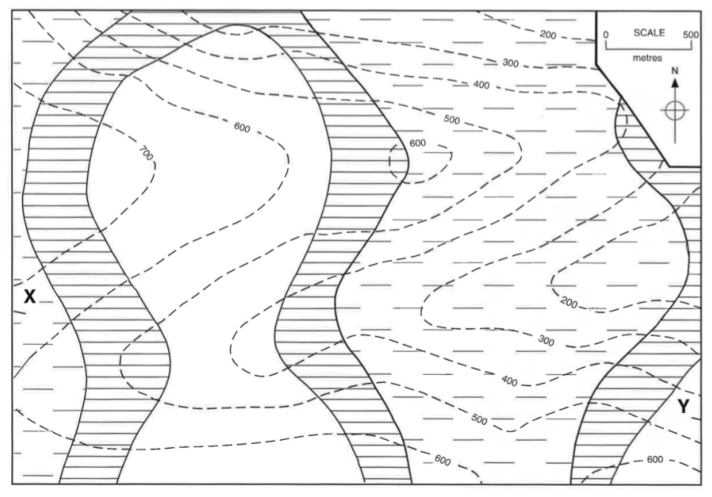

In [2]:
# Display map
img = mpimg.imread('map4.png')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [3]:
# Import other required libraries
import geopandas as gpd
import rasterio
import gemgis as gg
import os

In [4]:
# Get current directory
current_directory = os.getcwd()

In [5]:
# Read the topographic contours
topo = gpd.read_file(filename = current_directory+"/contours/contours.shp")
topo.head()

,X,Y,Z,geometry
0,2707.03,2761.08,200,POINT (2707.026 2761.082)
1,2754.92,2740.13,200,POINT (2754.923 2740.130)
2,2796.66,2725.60,200,POINT (2796.664 2725.601)
3,2854.29,2701.51,200,POINT (2854.286 2701.510)
4,2915.51,2684.03,200,POINT (2915.514 2684.025)


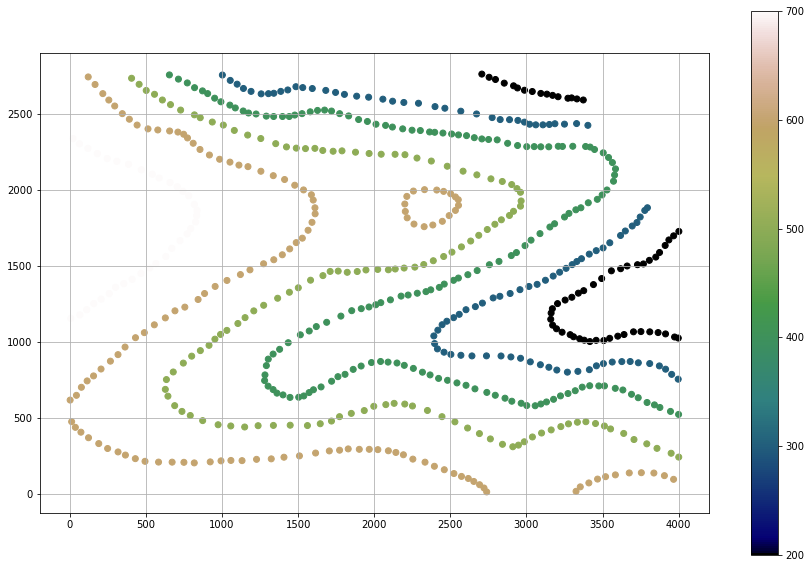

In [6]:
# Plot the contours
fix, ax = plt.subplots(1, figsize=(15, 10))
topo.plot(ax=ax,aspect='equal',column='Z', cmap='gist_earth', legend=True)
plt.grid()

In [7]:
# Interpolate contour lines to make DEM
topo_raster = gg.vector.interpolate_raster(gdf=topo,value='Z',method='rbf',res=5)

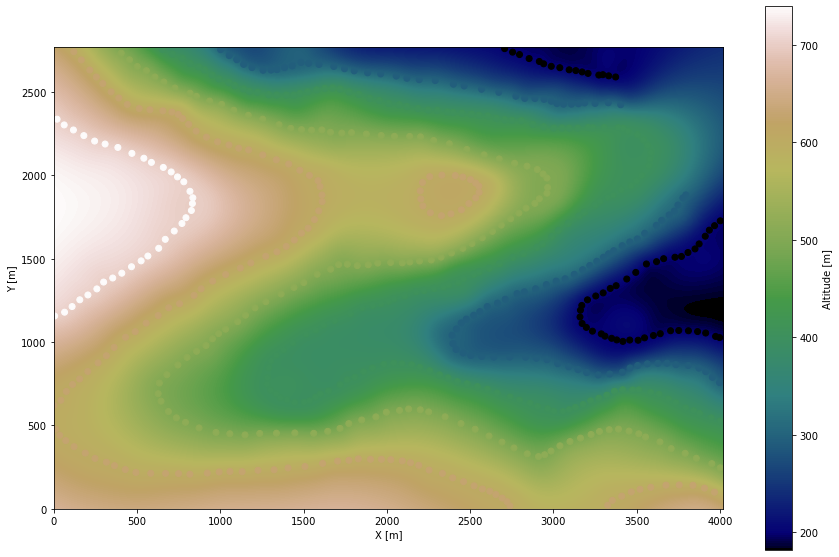

In [8]:
# Plot the DEM
fix, ax = plt.subplots(1, figsize=(15, 10))
topo.plot(ax=ax, aspect='equal', column='Z', cmap='gist_earth')
im = plt.imshow(topo_raster, origin='lower', extent=[0, 4020, 0, 2768], cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('Altitude [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]');

In [9]:
# Save the DEM as a tif file
gg.raster.save_as_tiff(raster=topo_raster, path='dem_map4.tif', 
                       extent=[0, 4020, 0, 2768], crs='EPSG:4326', overwrite_file=True)

Raster successfully saved


In [10]:
# Open the DEM from tif file
topo_raster = rasterio.open('dem_map4.tif')

In [11]:
# Read the contacts. These are the bases of the units
contacts = gpd.read_file(current_directory+'/contacts/contacts.shp')
contacts.head()

,X,Y,formation,geometry
0,741.78,307.08,A,POINT (741.781 307.081)
1,805.76,1010.18,A,POINT (805.759 1010.182)
2,504.36,2074.94,A,POINT (504.355 2074.937)
3,1143.31,2633.78,A,POINT (1143.313 2633.779)
4,1861.69,1931.02,A,POINT (1861.693 1931.024)


In [12]:
# Extract the Z coordinate of the points at the contacts
contacts_with_Z = gg.vector.extract_xyz(gdf=contacts, dem=topo_raster)
contacts_with_Z

,X,Y,formation,geometry,Z
0,741.78,307.08,A,POINT (741.781 307.081),565.29
1,805.76,1010.18,A,POINT (805.759 1010.182),526.48
2,504.36,2074.94,A,POINT (504.355 2074.937),707.98
3,1143.31,2633.78,A,POINT (1143.313 2633.779),322.97
4,1861.69,1931.02,A,POINT (1861.693 1931.024),583.97
5,1870.42,416.59,A,POINT (1870.416 416.590),548.86
6,926.49,722.43,A,POINT (926.485 722.430),460.74
7,1670.56,626.94,A,POINT (1670.561 626.938),418.81
8,1542.99,802.43,A,POINT (1542.988 802.426),393.64
9,1576.52,1049.57,A,POINT (1576.516 1049.569),397.73


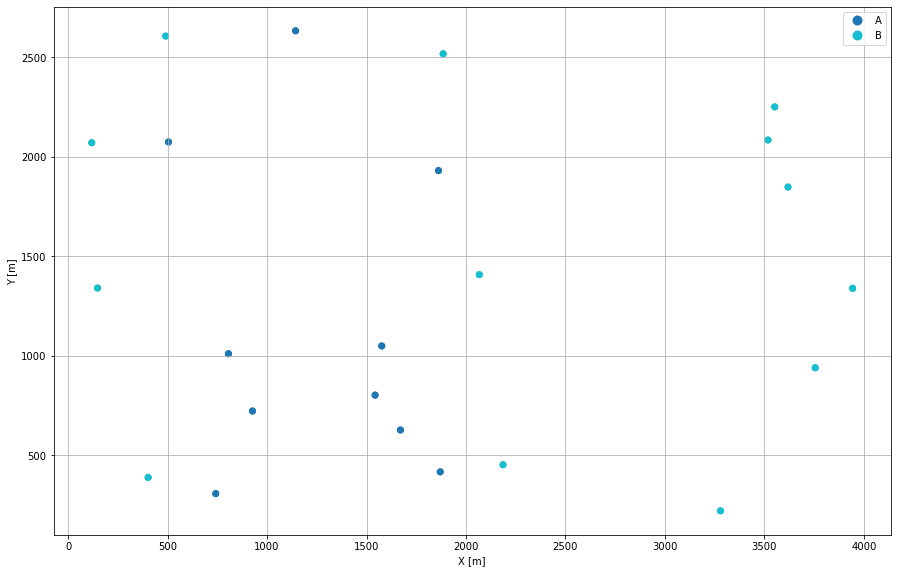

In [13]:
# Plot the points on the contacts
fig, ax = plt.subplots(1, figsize=(15, 10))
contacts.plot(ax=ax, column='formation', legend=True, aspect='equal')
contacts_with_Z.plot(ax=ax, column='formation', legend=True, aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]');

In [14]:
# Read the strike lines 
gdf = gpd.read_file(current_directory+'/strike_lines/strike_lines.shp')
gdf

,X,Y,Z,formation,id,geometry
0,848.63,935.15,500,A1,1,POINT (848.630 935.151)
1,857.85,2480.98,500,A1,1,POINT (857.845 2480.978)
2,681.96,2388.08,600,A1,2,POINT (681.956 2388.077)
3,686.82,1192.81,600,A1,2,POINT (686.819 1192.807)
4,1589.61,1086.55,400,A2,4,POINT (1589.610 1086.547)
5,1592.94,2520.84,400,A2,4,POINT (1592.943 2520.838)
6,1769.51,1461.83,500,A2,5,POINT (1769.505 1461.833)
7,1772.02,2258.93,500,A2,5,POINT (1772.018 2258.930)
8,353.63,951.30,600,B1,6,POINT (353.635 951.303)
9,365.20,2490.16,600,B1,6,POINT (365.200 2490.157)


In [15]:
# Convert the points into strike lines
linestring_gdf_A1 = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'A1'])
linestring_gdf_A2 = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'A2'])
linestring_gdf_B1 = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'B1'])
linestring_gdf_B2 = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'B2'])
linestring_gdf_B3 = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'B3'])

In [16]:
# Check that the strike lines are valid
linestring_gdf_A1.is_valid

0    True
1    True
dtype: bool

In [17]:
linestring_gdf_A2.is_valid

0    True
1    True
dtype: bool

In [18]:
linestring_gdf_B1.is_valid

0    True
1    True
dtype: bool

In [19]:
linestring_gdf_B2.is_valid

0    True
1    True
dtype: bool

In [20]:
linestring_gdf_B3.is_valid

0    True
1    True
dtype: bool

In [21]:
# Calculate orientations 
orientations_A1 = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_A1)
orientations_A1

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,31.48,90.13,550.00,POINT (768.812 1749.253),1.00,768.81,1749.25,A1


In [22]:
orientations_A2 = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_A2)
orientations_A2

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,29.19,270.14,450.00,POINT (1681.019 1832.037),1.00,1681.02,1832.04,A2


In [23]:
orientations_B1 = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_B1)
orientations_B1

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,30.36,90.18,650.00,POINT (270.417 1736.988),1.00,270.42,1736.99,B1


In [24]:
orientations_B2 = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_B2)
orientations_B2

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,29.24,269.70,450.00,POINT (2028.271 1850.708),1.00,2028.27,1850.71,B2


In [25]:
orientations_B3 = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_B3)
orientations_B3

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,31.61,89.20,250.00,POINT (3782.751 1325.331),1.00,3782.75,1325.33,B3


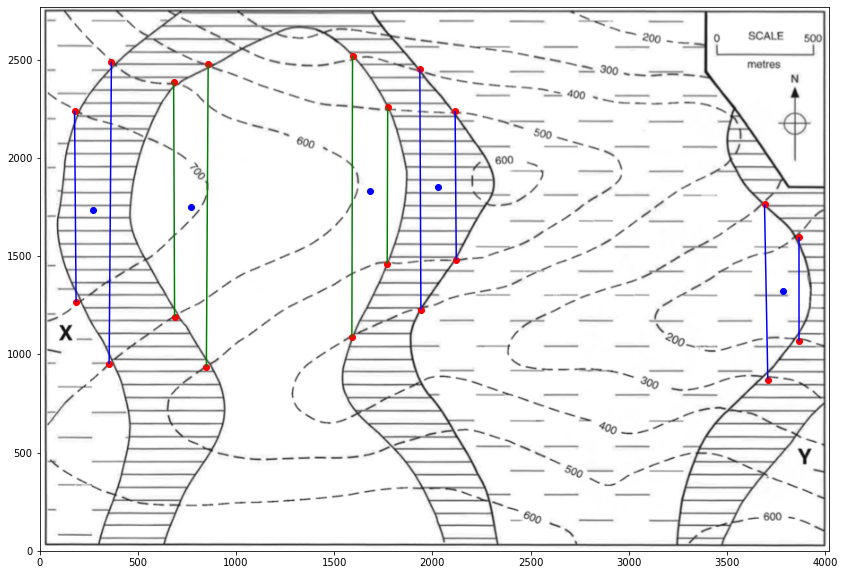

In [26]:
# Plot all this information on the map, so we can better understand this structure
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.imshow(img, extent=[0, 4020, 0, 2768], cmap='gray')
# plot points
gdf.plot(ax=ax, aspect='equal', color='red')
# plot strike lines
# western contact of white and striped units
linestring_gdf_A1.plot(ax=ax, aspect='equal', color='green')
orientations_A1.plot(ax=ax, aspect='equal', color='blue')
# eastern contact of white and striped units
linestring_gdf_A2.plot(ax=ax, aspect='equal', color='green')
orientations_A2.plot(ax=ax, aspect='equal', color='blue')
# western contact of striped and dashed units
linestring_gdf_B1.plot(ax=ax, aspect='equal', color='blue')
orientations_B1.plot(ax=ax, aspect='equal', color='blue')
# contact between striped and dashed units in the middle of the map
linestring_gdf_B2.plot(ax=ax, aspect='equal', color='blue')
orientations_B2.plot(ax=ax, aspect='equal', color='blue')
# eastern contact between striped and dashed units
linestring_gdf_B3.plot(ax=ax, aspect='equal', color='blue')
orientations_B3.plot(ax=ax, aspect='equal', color='blue');

A1 and B1 dip 30 degrees to the east, whereas A2 and B2 dip 30 degrees to the west. This tell us that the structure in the west is a syncline (the beds dip towards the core of the structure). B3 dips 30 degrees to the east, this tells us that the structure in the east is an anticline (the beds dip away from the core of the structure). So, here we have a syncline-anticline pair.

In [27]:
# Merge orientations
import pandas as pd
orientations = pd.concat([orientations_A1, orientations_A2,orientations_B1,orientations_B2,orientations_B3]).reset_index()
orientations

,index,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,0,31.48,90.13,550.00,POINT (768.812 1749.253),1.00,768.81,1749.25,A1
1,0,29.19,270.14,450.00,POINT (1681.019 1832.037),1.00,1681.02,1832.04,A2
2,0,30.36,90.18,650.00,POINT (270.417 1736.988),1.00,270.42,1736.99,B1
3,0,29.24,269.70,450.00,POINT (2028.271 1850.708),1.00,2028.27,1850.71,B2
4,0,31.61,89.20,250.00,POINT (3782.751 1325.331),1.00,3782.75,1325.33,B3


In [28]:
# Rename the orientations as if they come from two units A and B
orientations['formation'] = ['A', 'A', 'B', 'B', 'B']
orientations

,index,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,0,31.48,90.13,550.00,POINT (768.812 1749.253),1.00,768.81,1749.25,A
1,0,29.19,270.14,450.00,POINT (1681.019 1832.037),1.00,1681.02,1832.04,A
2,0,30.36,90.18,650.00,POINT (270.417 1736.988),1.00,270.42,1736.99,B
3,0,29.24,269.70,450.00,POINT (2028.271 1850.708),1.00,2028.27,1850.71,B
4,0,31.61,89.20,250.00,POINT (3782.751 1325.331),1.00,3782.75,1325.33,B


# Construction of the model in GemPy

In [29]:
# Import Gempy
import gempy as gp

In [30]:
# Create a geomodel object called model4
geo_model = gp.create_model('model4')

In [31]:
# Define model extent, resolution, surface points, and orientations
gp.init_data(geo_model, [0, 4020, 0, 2768, 0, 1000], [100, 100, 100],
             surface_points_df=contacts_with_Z,
             orientations_df=orientations, default_values=True);

Active grids: ['regular']


In [32]:
# Check default series
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,A,Default series,1,#015482,1
1,B,Default series,2,#9f0052,2


In [33]:
# The base of the lowermost unit C (dashed) does not outcrop in the map
# This unit is our "basement", we add it manually
geo_model.add_surfaces('C')

# Group the surfaces as series Strata
gp.map_stack_to_surfaces(geo_model, {'Strata': ('A', 'B','C'),},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
0,A,Strata,1,#015482,1
1,B,Strata,2,#9f0052,2
2,C,Strata,3,#ffbe00,3


In [34]:
# Check that the data are correct
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
0,A,Strata,1,#015482,1,10,2
1,B,Strata,2,#9f0052,2,13,3
2,C,Strata,3,#ffbe00,3,0,0


In [35]:
# Set the topography of the model
geo_model.set_topography(source='gdal',filepath='dem_map4.tif');

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


In [36]:
# Plot the points on the contacts and topography in 3D 
# This will open a PyVista window. This may take some time, please wait
from pyvistaqt import BackgroundPlotter
gp.plot_3d(geo_model, plotter_type='background',show_topography=True);

In [37]:
# Now we have enough data to interpolate. This may take some time, please wait
gp.set_interpolator(geo_model, compile_theano=True, 
                    theano_optimizer='fast_compile');

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                    values
range             4982.19
$C_o$           591005.33
drift equations       [3]


In [38]:
# Ignore warnings from np
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# Compute the geological model. This may take some time, please wait
gp.compute_model(geo_model);

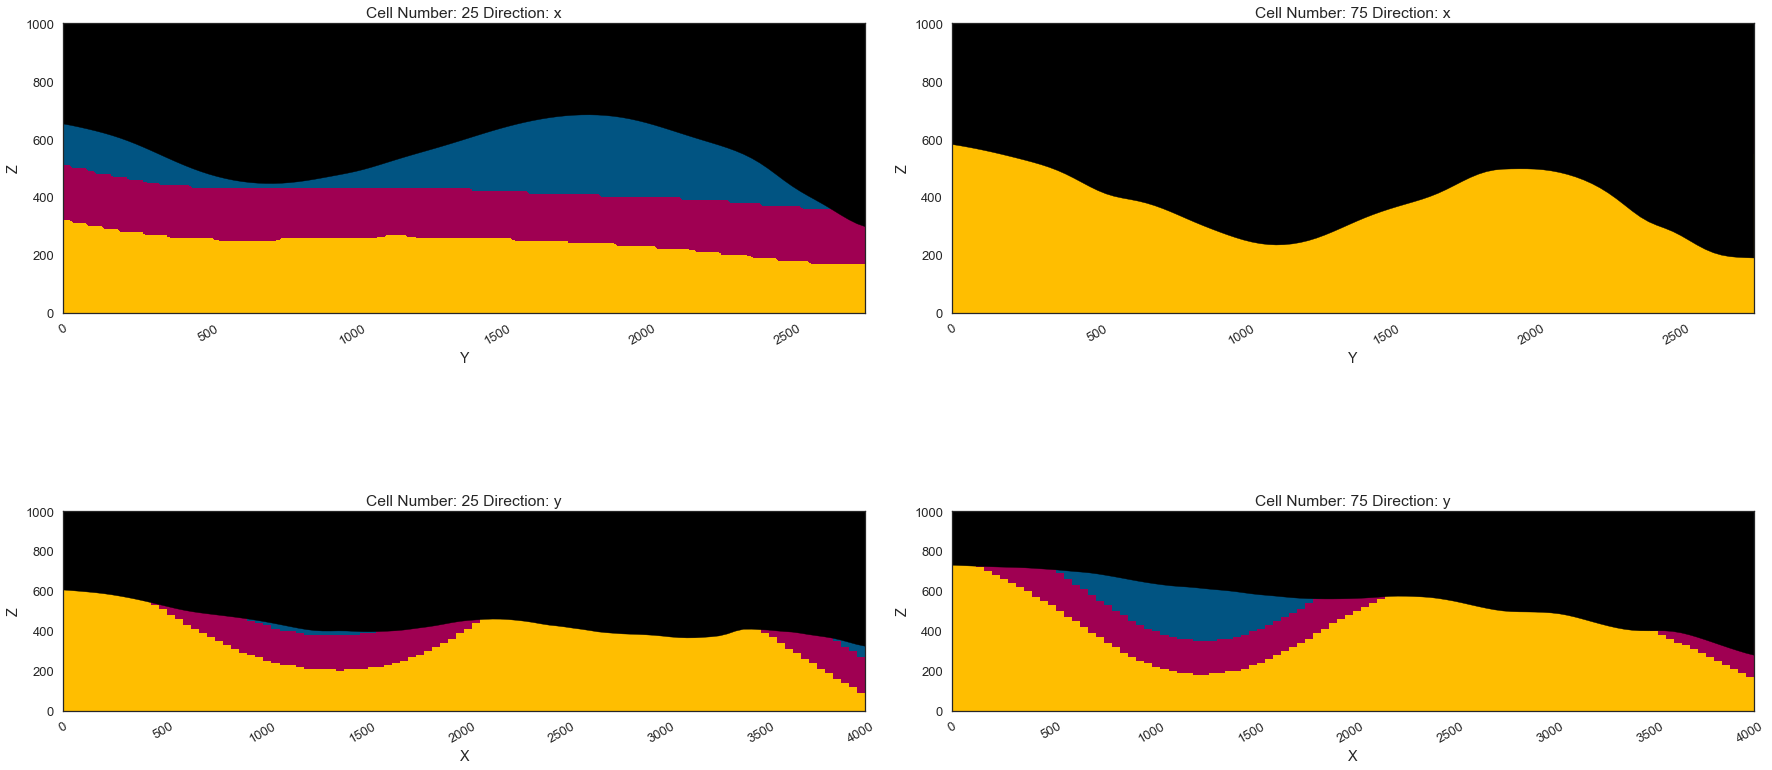

In [39]:
# Plot north-south and east-west sections without vertical exaggeration
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 75, 25, 75], 
           show_data=False, show_boundaries=False, show_topography=True, show=False);

In [40]:
# Plot the geomodel in 3D, this will open a PyVista window. This may take some time, please wait
gp.plot_3d(geo_model, plotter_type='background', show_topography=True, show_lith=False);